In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 📂 Load dataset
df = pd.read_csv('/Users/yashbhilare21/Downloads/Flipkart Big Billion Days Analysis 2024/Data/Flipkart_BBD_2024_data.csv')
df.head()


,order_id,user_id,product_name,category,price,discount_percent,order_date,payment_method,city,delivery_days,discount_amount,final_price
0,ORD100000,USR4962,Purpose X,Home Appliances,71924.76,50,2025-05-26,Credit Card,Delhi,9,35962.3800,35962.3800
1,ORD100001,USR9952,Brother Max,Books,55251.20,15,2025-06-01,Net Banking,Chennai,7,8287.6800,46963.5200
2,ORD100002,USR6192,Ago Max,Electronics,90665.10,5,2025-05-06,Net Banking,Mumbai,6,4533.2550,86131.8450
3,ORD100003,USR7425,Site Lite,Books,31763.57,25,2025-05-20,UPI,Pune,3,7940.8925,23822.6775
4,ORD100004,USR9803,Face Pro,Toys,63186.85,15,2025-05-04,Credit Card,Pune,10,9478.0275,53708.8225


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10000 non-null  object 
 1   user_id           10000 non-null  object 
 2   product_name      10000 non-null  object 
 3   category          10000 non-null  object 
 4   price             10000 non-null  float64
 5   discount_percent  10000 non-null  int64  
 6   order_date        10000 non-null  object 
 7   payment_method    10000 non-null  object 
 8   city              10000 non-null  object 
 9   delivery_days     10000 non-null  int64  
 10  discount_amount   10000 non-null  float64
 11  final_price       10000 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


,price,discount_percent,delivery_days,discount_amount,final_price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50089.906773,32.526000,5.530500,16390.479940,33699.426833
std,28711.462014,20.752768,2.879114,15291.911446,22604.284103
min,200.080000,5.000000,1.000000,19.046500,61.065000
25%,25268.810000,15.000000,3.000000,4420.573250,14992.057500
50%,50093.615000,30.000000,6.000000,11415.612000,29885.750250
75%,74983.082500,50.000000,8.000000,23809.998000,49420.379625
max,99996.500000,70.000000,10.000000,69918.100000,94936.625500


In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.isna().sum()

order_id            0
user_id             0
product_name        0
category            0
price               0
discount_percent    0
order_date          0
payment_method      0
city                0
delivery_days       0
discount_amount     0
final_price         0
dtype: int64

In [8]:
total_revenue = df['final_price'].sum()
total_discount = df['discount_amount'].sum()
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Discount Given: ₹{total_discount:,.2f}")

Total Revenue: ₹336,994,268.33
Total Discount Given: ₹163,904,799.40


/var/folders/9z/8d_rpc391dl9v1d8f2y4w56c0000gn/T/ipykernel_85117/418353464.py:4: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/yashbhilare21/Downloads/Flipkart Big Billion Days Analysis 2024/Notebooks/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yashbhilare21/Downloads/Flipkart Big Billion Days Analysis 2024/Notebooks/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


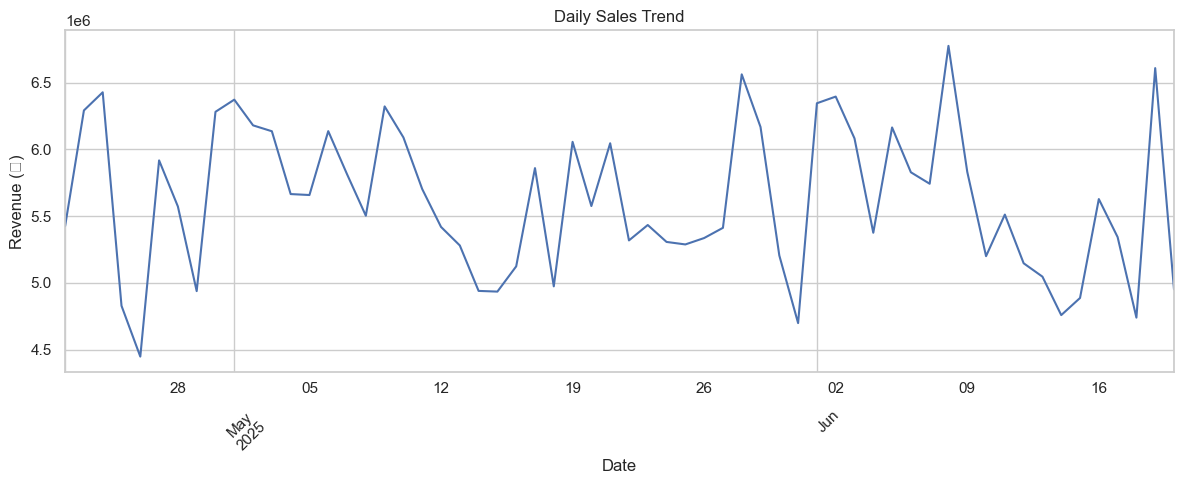

In [9]:
daily_sales = df.groupby('order_date')['final_price'].sum()
daily_sales.plot(figsize=(12, 5), title='Daily Sales Trend', ylabel='Revenue (₹)', xlabel='Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/yashbhilare21/Downloads/Flipkart Big Billion Days Analysis 2024/Notebooks/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


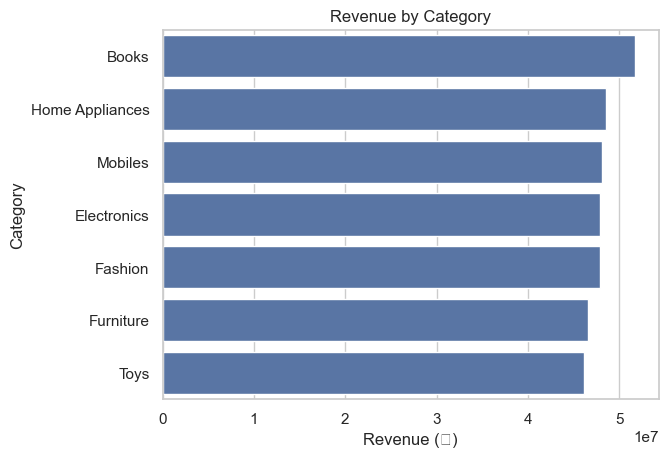

In [10]:
category_sales = df.groupby('category')['final_price'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Revenue by Category')
plt.xlabel('Revenue (₹)')
plt.ylabel('Category')
plt.show()

/Users/yashbhilare21/Downloads/Flipkart Big Billion Days Analysis 2024/Notebooks/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


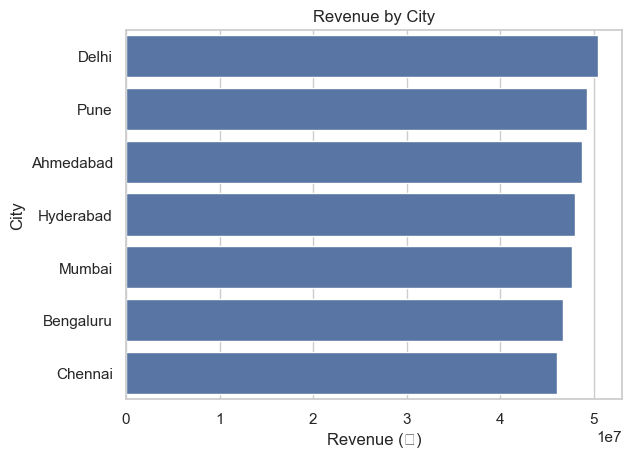

In [11]:
city_sales = df.groupby('city')['final_price'].sum().sort_values(ascending=False)
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title('Revenue by City')
plt.xlabel('Revenue (₹)')
plt.ylabel('City')
plt.show()

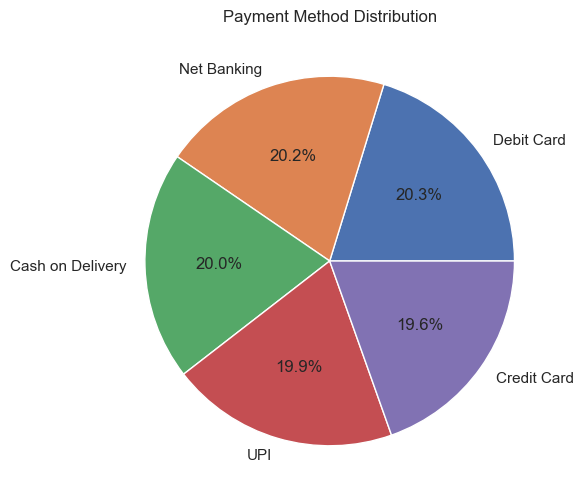

In [12]:
payment_counts = df['payment_method'].value_counts()
payment_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Payment Method Distribution')
plt.ylabel('')
plt.show()

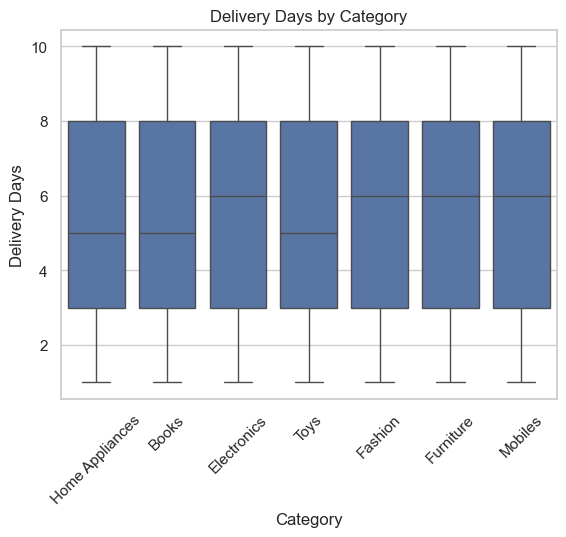

In [13]:
sns.boxplot(x='category', y='delivery_days', data=df)
plt.title('Delivery Days by Category')
plt.xlabel('Category')
plt.ylabel('Delivery Days')
plt.xticks(rotation=45)
plt.show()

In [14]:
df['profit_estimate'] = df['final_price'] * 0.15
total_profit = df['profit_estimate'].sum()
print(f"Estimated Total Profit: ₹{total_profit:,.2f}")

Estimated Total Profit: ₹50,549,140.25
